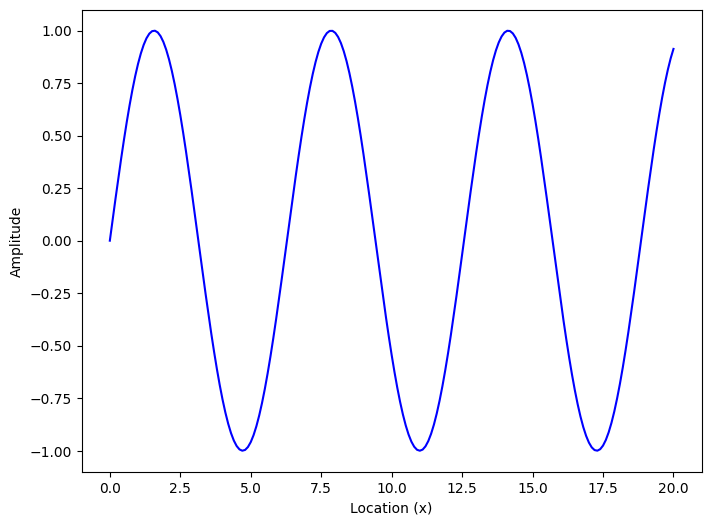

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('seaborn-poster')
# %matplotlib inline

# Generate x values from 0 to 20, with 201 evenly spaced points
x = np.linspace(0, 20, 201)
# Calculate y as the sine of x
y = np.sin(x)

# Create a figure with width 8 inches and height 6 inches
plt.figure(figsize = (8, 6))
# Plot the sine wave in blue ('b')
plt.plot(x, y, 'b')
# Label the y-axis
plt.ylabel('Amplitude')
# Label the x-axis
plt.xlabel('Location (x)')
# Show the figure
plt.show()

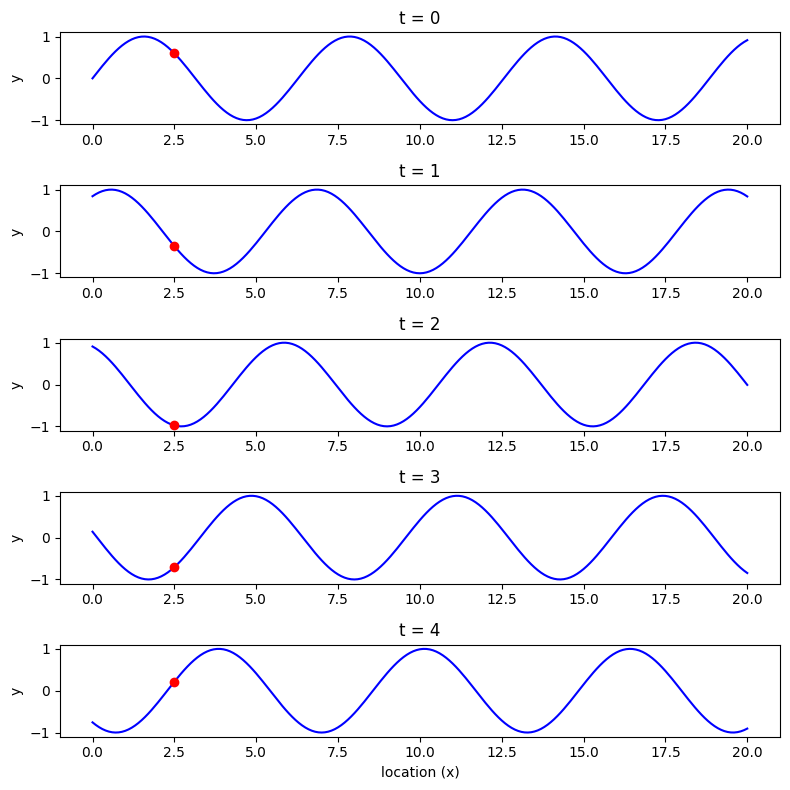

In [3]:
# Create a square figure (8x8 inches)
fig = plt.figure(figsize = (8,8))

# Create an array [0, 1, 2, 3, 4] representing time shifts
times = np.arange(5)

# Number of time steps
n = len(times)

# Loop through each time value
for t in times:
    # Create subplot (n rows, 1 column, position t+1)
    plt.subplot(n, 1, t+1)
    # Generate sine wave shifted by t
    y = np.sin(x + t)
    # Plot sine wave in blue
    plt.plot(x, y, 'b')
    # Highlight one specific point on the curve: x[25] and its corresponding y value
    plt.plot(x[25], y [25], 'ro')
    # Set y-axis limits to keep all plots comparable
    plt.ylim(-1.1, 1.1)
    # Label y-axis
    plt.ylabel('y')
    # Add title showing the current time shift
    plt.title(f't = {t}')

# Label x-axis for the bottom plot
plt.xlabel('location (x)')
# Adjust spacing between subplots so labels/titles don't overlap
plt.tight_layout()
# Show all subplots
plt.show()

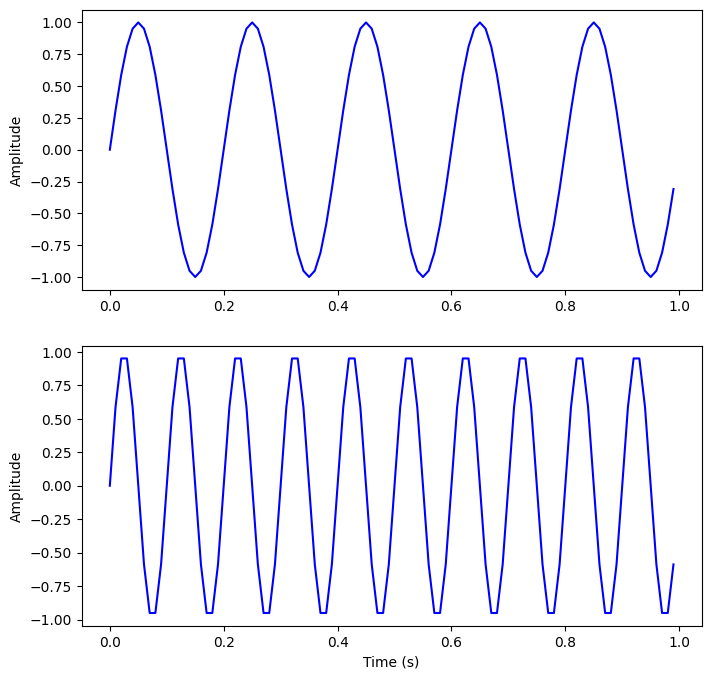

In [4]:
# Sampling rate in Hz (samples per second)
sr = 100.0
# Sampling interval (time between samples) = 1 / sampling rate
ts = 1.0/sr
# Generate time values from 0 to 1 second (exclusive) with step size ts
t = np.arange(0,1,ts)

# Frequency of first signal in Hz
freq = 5
# Sine wave equation: sin(2π × frequency × time)
y = np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)    # 2 rows, 1 column, first plot
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

freq = 10   
y = np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

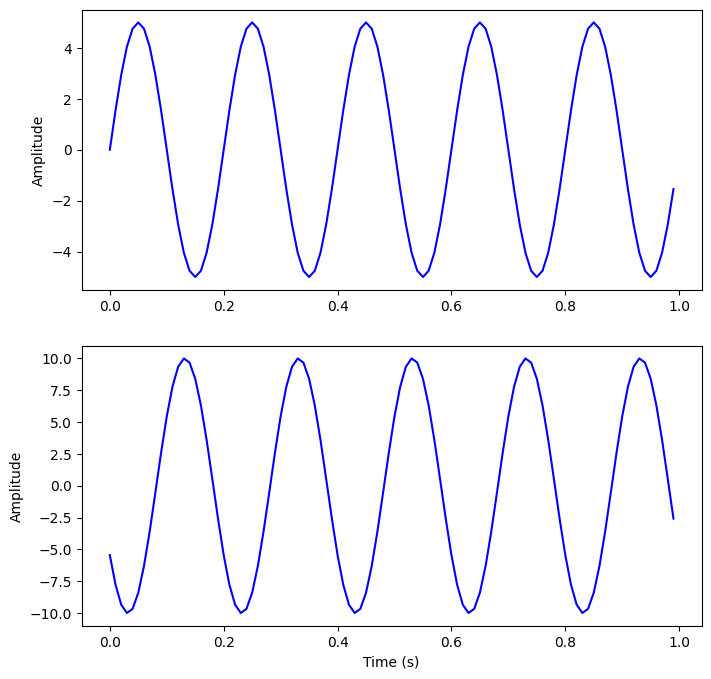

In [5]:
# Sampling rate in Hz (samples per second)
sr = 100.0
# Sampling interval (time between samples) = 1 / sampling rate
ts = 1.0/sr
# Generate time values from 0 to 1 second (exclusive) with step size ts
t = np.arange(0,1,ts)

# frequency of the signal
freq = 5   # Frequency in Hz (5 cycles per second)
y = 5*np.sin(2*np.pi*freq*t + 0)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')
 
y = 10*np.sin(2*np.pi*freq*t + 10)  # Added phase shift by 10 horizontally

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

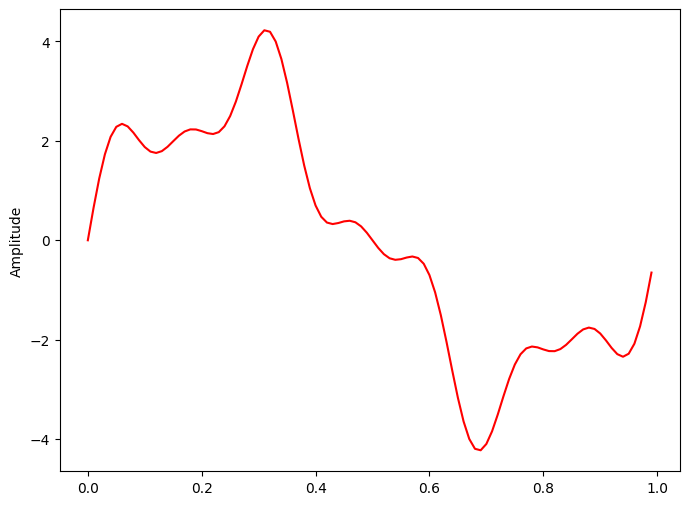

In [6]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [7]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

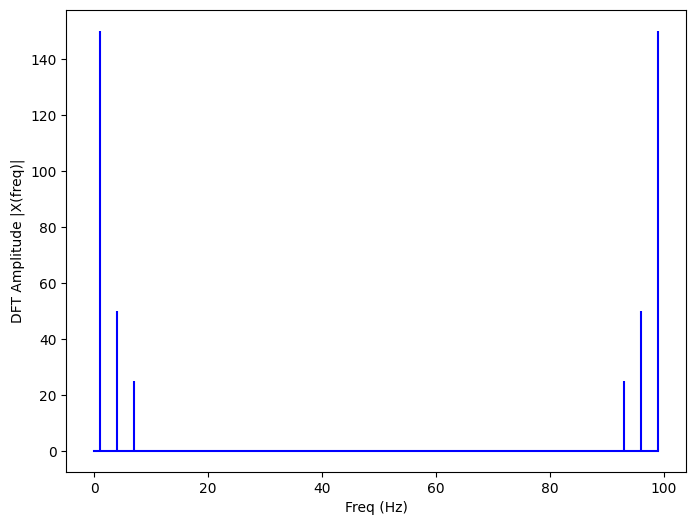

In [8]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

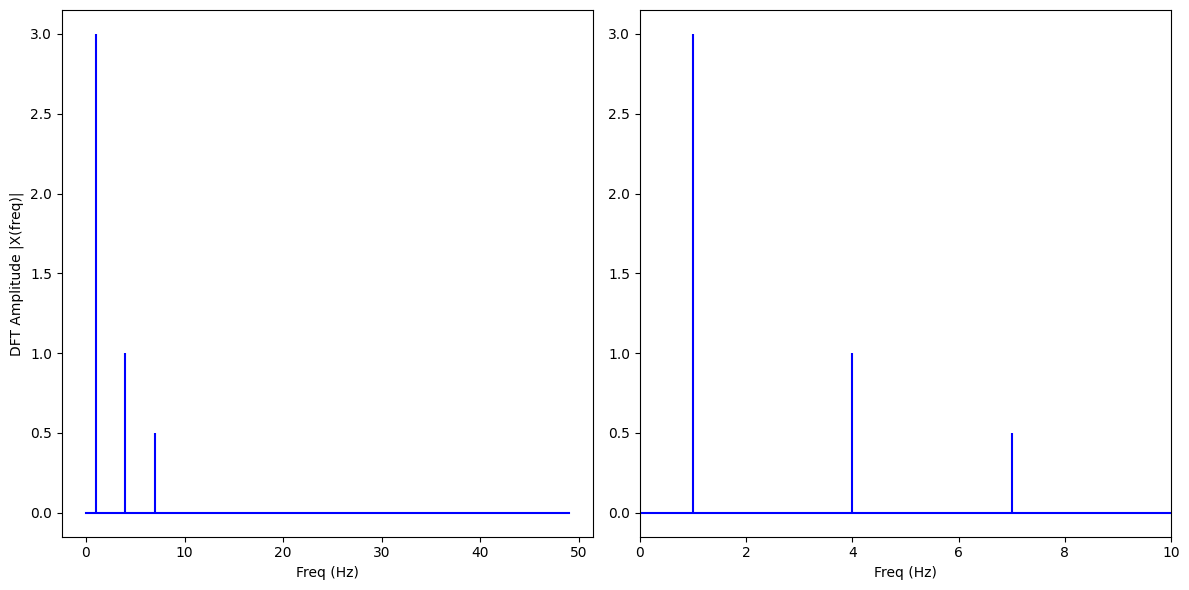

In [9]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [10]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [11]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

KeyboardInterrupt: 

In [ ]:
# sampling rate 20000
sr = 20000
%timeit DFT(gen_sig(sr))

# Using hardcoded input x=[1,2,3,4]

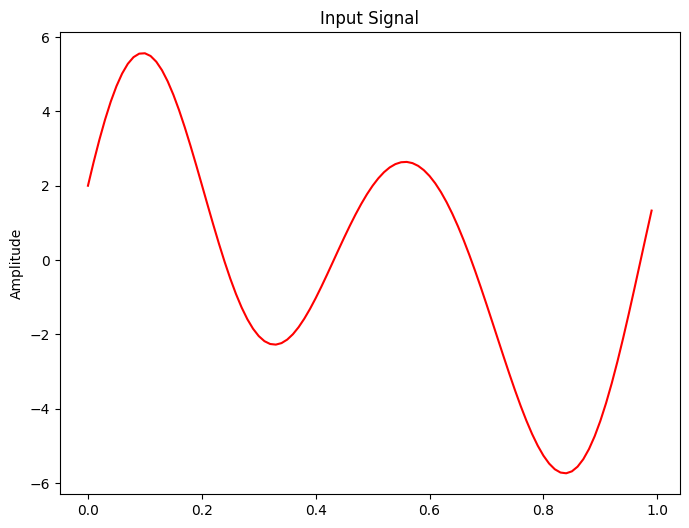

In [5]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# x=np.array([ 0.00000000e+00,  9.58259988e-01,  1.89309058e+00,  2.78179262e+00,
#         3.60310286e+00,  4.33785138e+00,  4.96954872e+00,  5.48488308e+00,
#         5.87411113e+00,  6.13132967e+00,  6.25461926e+00,  6.24605574e+00,
#         6.11158980e+00,  5.86079933e+00,  5.50652382e+00,  5.06439391e+00,
#         4.55227282e+00,  3.98962936e+00,  3.39686453e+00,  2.79461500e+00,
#         2.20305785e+00,  1.64124028e+00,  1.12645740e+00,  6.73699053e-01,
#         2.95184478e-01,  4.44089210e-16, -2.06148456e-01, -3.21060496e-01,
#        -3.46040811e-01, -2.85774413e-01, -1.48083163e-01,  5.64265725e-02,
#         3.14811557e-01,  6.12317663e-01,  9.32964607e-01,  1.26016784e+00,
#         1.57737481e+00,  1.86869241e+00,  2.11948289e+00,  2.31690674e+00,
#         2.45039319e+00,  2.51202146e+00,  2.49679943e+00,  2.40283011e+00,
#         2.23136030e+00,  1.98671037e+00,  1.67608816e+00,  1.30929441e+00,
#         8.98331032e-01,  4.56927054e-01,  8.95672379e-16, -4.56927054e-01,
#        -8.98331032e-01, -1.30929441e+00, -1.67608816e+00, -1.98671037e+00,
#        -2.23136030e+00, -2.40283011e+00, -2.49679943e+00, -2.51202146e+00,
#        -2.45039319e+00, -2.31690674e+00, -2.11948289e+00, -1.86869241e+00,
#        -1.57737481e+00, -1.26016784e+00, -9.32964607e-01, -6.12317663e-01,
#        -3.14811557e-01, -5.64265725e-02,  1.48083163e-01,  2.85774413e-01,
#         3.46040811e-01,  3.21060496e-01,  2.06148456e-01,  8.88178420e-16,
#        -2.95184478e-01, -6.73699053e-01, -1.12645740e+00, -1.64124028e+00,
#        -2.20305785e+00, -2.79461500e+00, -3.39686453e+00, -3.98962936e+00,
#        -4.55227282e+00, -5.06439391e+00, -5.50652382e+00, -5.86079933e+00,
#        -6.11158980e+00, -6.24605574e+00, -6.25461926e+00, -6.13132967e+00,
#        -5.87411113e+00, -5.48488308e+00, -4.96954872e+00, -4.33785138e+00,
#        -3.60310286e+00, -2.78179262e+00, -1.89309058e+00, -9.58259988e-01])

# # Using Sine
# # sampling rate
# sr = 100
# # sampling interval
# ts = 1.0/sr
# t = np.arange(0,1,ts)

# freq = 1.
# x = 3*np.sin(2*np.pi*freq*t)

# freq = 4
# x += np.sin(2*np.pi*freq*t)

# freq = 7   
# x += 0.5* np.sin(2*np.pi*freq*t)
x=t

# s_1 (amplitude=2, freq=2/2, t=x, phase=0)
s_1_amplitude = 2
s_1_freq = 1
s_1_phase = 0

s_1 = s_1_amplitude * np.sin(2 * np.pi * s_1_freq * x + s_1_phase)

# s_2 (amplitude=4, freq=4/2, t=x, phase=pi/6)
s_2_amplitude = 4
s_2_freq = 2
s_2_phase = np.pi/6

s_2 = s_2_amplitude * np.sin(2 * np.pi * s_2_freq * x + s_2_phase)

# s_3 (amplitude=0.5, freq=6/2, t=x, phase=0)
s_3_amplitude = 0.5
s_3_freq = 3
s_3_phase = 0

s_3 = s_3_amplitude * np.sin(2 * np.pi * s_3_freq * x + s_3_phase)

# s = s_1(x) + s_2(x) + s_3(x)
x = s_1 + s_2 + s_3

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Input Signal')

plt.show()

In [6]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    print(np.around(e, 3))
    print(f'{e.shape}')
    print(x)
    print(f'{x.shape}')
    X = np.dot(e, x)
    
    return X

[[1.   +0.j    1.   +0.j    1.   +0.j    ... 1.   +0.j    1.   +0.j
  1.   +0.j   ]
 [1.   +0.j    0.998-0.063j 0.992-0.125j ... 0.982+0.187j 0.992+0.125j
  0.998+0.063j]
 [1.   +0.j    0.992-0.125j 0.969-0.249j ... 0.93 +0.368j 0.969+0.249j
  0.992+0.125j]
 ...
 [1.   +0.j    0.982+0.187j 0.93 +0.368j ... 0.844-0.536j 0.93 -0.368j
  0.982-0.187j]
 [1.   +0.j    0.992+0.125j 0.969+0.249j ... 0.93 -0.368j 0.969-0.249j
  0.992-0.125j]
 [1.   +0.j    0.998+0.063j 0.992+0.125j ... 0.982-0.187j 0.992-0.125j
  0.998-0.063j]]
(100, 100)
[ 2.          2.63766816  3.23338211  3.77744986  4.26111037  4.67672432
  5.01794062  5.27983431  5.45901203  5.55368238  5.56368917  5.4905068
  5.33719787  5.10833421  4.80988355  4.44906491  4.03417674  3.57440224
  3.07959735  2.56006681  2.02633426  1.48891233  0.95807842  0.44366188
 -0.04515251 -0.5        -0.91348663 -1.2793122  -1.59236329 -1.84877503
 -2.04596142 -2.18261466 -2.25867499 -2.27527322 -2.23464897 -2.14004792
 -1.99560216 -1.80619779 -1

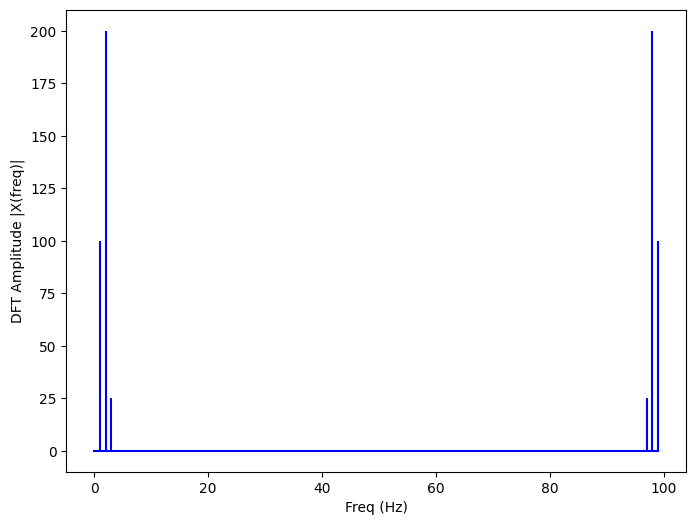

In [7]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [8]:
# index=3
# print(f'hertz:     {freq[index]}')
# print(f'amplitude: {round(abs(X[index]), 5)}')

print(f'hertz:     {freq}')
print(f'amplitude: {abs(X)}')

hertz:     [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
amplitude: [2.42028619e-14 1.00000000e+02 2.00000000e+02 2.50000000e+01
 7.10889596e-15 6.25929770e-15 5.27195807e-14 3.89826244e-14
 7.07978524e-14 6.59468738e-14 8.00344187e-14 8.18760878e-14
 2.32618219e-14 1.16192478e-13 1.37646347e-13 1.91896036e-13
 1.47960410e-13 2.77951269e-13 4.40796292e-14 3.39613140e-13
 2.10603018e-13 1.90487355e-13 7.90678359e-14 2.92964275e-14
 6.52206656e-14 1.38328473e-13 2.18629498e-13 3.33293020e-13
 4.25885951e-14 3.25590388e-13 1.45613495e-13 3.52409902e-13
 3.07418896e-13 2.80113669e-13 5.30136717e-13 4.87132161e-13
 1.58263687e-13 3.5458

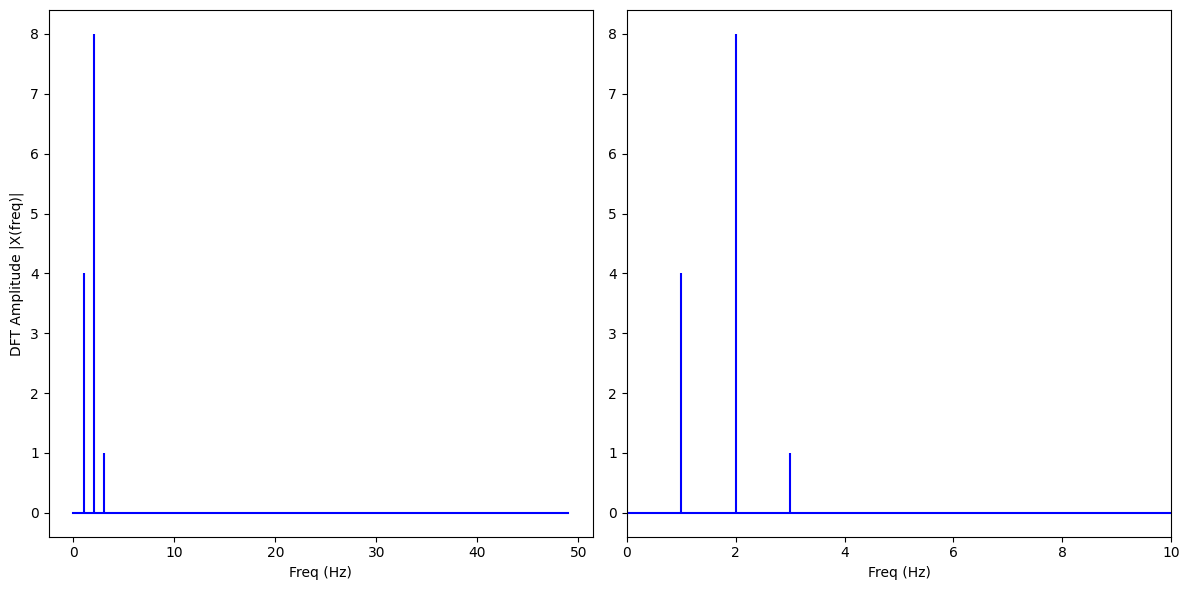

In [9]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside = X[:n_oneside]/ n_oneside
X_oneside[1:] = 2 * X_oneside[1:]


plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

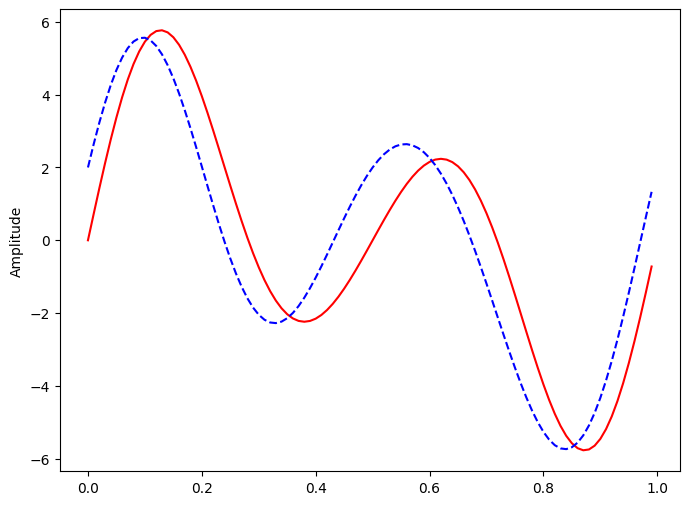

In [14]:
input_freq = 0
input_x = 0

for i in range(len(f_oneside)):
    input_freq = f_oneside[i]
    input_x += (2 * abs(X[i]) / N) * np.sin(2 * np.pi * input_freq * t )
    # Why does the formula above needs to be multiplied by 2

plt.figure(figsize = (8, 6))
plt.plot(t, input_x, 'r')
plt.plot(t, x, 'b--', label='Original')
plt.ylabel('Amplitude')

plt.show()

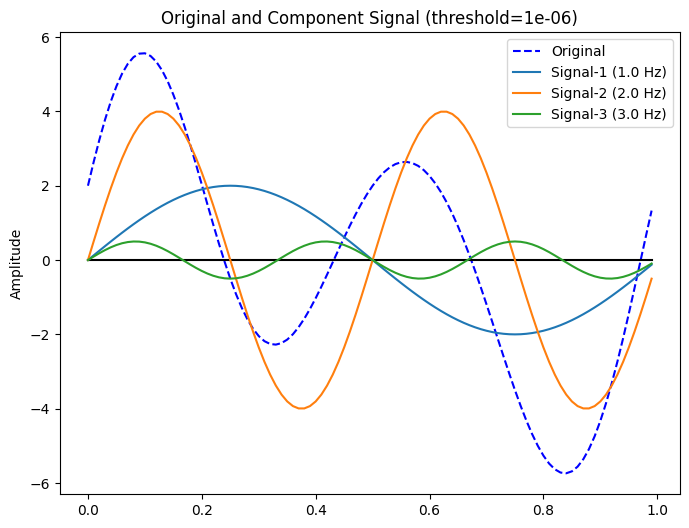

In [11]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'b--', label='Original')
plt.plot(t, np.zeros(len(x)), 'black')

for i in range(len(f_oneside)):
    input_freq = f_oneside[i]
    input_x = (2 * abs(X[i]) / N) * np.sin(2 * np.pi * input_freq * t )
    
    # Hide if it's too small
    threshold = 1e-6
    if (2 * abs(X[i]) / N) < threshold:
            continue
    
    plt.plot(t, input_x, label=f'Signal-{i} ({np.round((input_freq).astype(float), 2)} Hz)')

plt.ylabel('Amplitude')
plt.title(f'Original and Component Signal (threshold={threshold})')
plt.legend()

# FINISH

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. Original signal
# ------------------------------
sr = 100                    # sampling rate
ts = 1.0 / sr               # sampling interval
t = np.arange(0, 1, ts)     # time vector

x = [0.00000000e+00, 9.58259988e-01, 1.89309058e+00, 2.78179262e+00,
     3.60310286e+00, 4.33785138e+00, 4.96954872e+00, 5.48488308e+00,
     5.87411113e+00, 6.13132967e+00, 6.25461926e+00, 6.24605574e+00,
     6.11158980e+00, 5.86079933e+00, 5.50652382e+00, 5.06439391e+00,
     4.55227282e+00, 3.98962936e+00, 3.39686453e+00, 2.79461500e+00,
     2.20305785e+00, 1.64124028e+00, 1.12645740e+00, 6.73699053e-01,
     2.95184478e-01, 4.44089210e-16, -2.06148456e-01, -3.21060496e-01,
    -3.46040811e-01, -2.85774413e-01, -1.48083163e-01,  5.64265725e-02,
     3.14811557e-01,  6.12317663e-01,  9.32964607e-01,  1.26016784e+00,
     1.57737481e+00,  1.86869241e+00,  2.11948289e+00,  2.31690674e+00,
     2.45039319e+00,  2.51202146e+00,  2.49679943e+00,  2.40283011e+00,
     2.23136030e+00,  1.98671037e+00,  1.67608816e+00,  1.30929441e+00,
     8.98331032e-01,  4.56927054e-01,  8.95672379e-16, -4.56927054e-01,
    -8.98331032e-01, -1.30929441e+00, -1.67608816e+00, -1.98671037e+00,
    -2.23136030e+00, -2.40283011e+00, -2.49679943e+00, -2.51202146e+00,
    -2.45039319e+00, -2.31690674e+00, -2.11948289e+00, -1.86869241e+00,
    -1.57737481e+00, -1.26016784e+00, -9.32964607e-01, -6.12317663e-01,
    -3.14811557e-01, -5.64265725e-02,  1.48083163e-01,  2.85774413e-01,
     3.46040811e-01,  3.21060496e-01,  2.06148456e-01,  8.88178420e-16,
    -2.95184478e-01, -6.73699053e-01, -1.12645740e+00, -1.64124028e+00,
    -2.20305785e+00, -2.79461500e+00, -3.39686453e+00, -3.98962936e+00,
    -4.55227282e+00, -5.06439391e+00, -5.50652382e+00, -5.86079933e+00,
    -6.11158980e+00, -6.24605574e+00, -6.25461926e+00, -6.13132967e+00,
    -5.87411113e+00, -5.48488308e+00, -4.96954872e+00, -4.33785138e+00,
    -3.60310286e+00, -2.78179262e+00, -1.89309058e+00, -9.58259988e-01]

plt.figure(figsize=(8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title("Original Signal")
plt.show()

# ------------------------------
# 2. Discrete Fourier Transform
# ------------------------------
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

X = DFT(x)

# Frequency axis
N = len(X)
n = np.arange(N)
T = N / sr
freq = n / T

plt.figure(figsize=(8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')
plt.title("DFT Magnitude Spectrum")
plt.show()

# ------------------------------
# 3. Correct inverse DFT
# ------------------------------
reconstructed_x = np.zeros(N, dtype=complex)
for k in range(N):
    reconstructed_x += (X[k] / N) * np.exp(2j * np.pi * k * np.arange(N) / N)

# Only take real part (imaginary part is ~0 due to numerical rounding)
reconstructed_x = reconstructed_x.real

plt.figure(figsize=(8, 6))
plt.plot(t, x, 'r--', alpha=0.6, label='Original')
plt.plot(t, reconstructed_x, 'g', label='Reconstructed')
plt.legend()
plt.title("Original vs Reconstructed Signal (Inverse DFT)")
plt.show()


# test

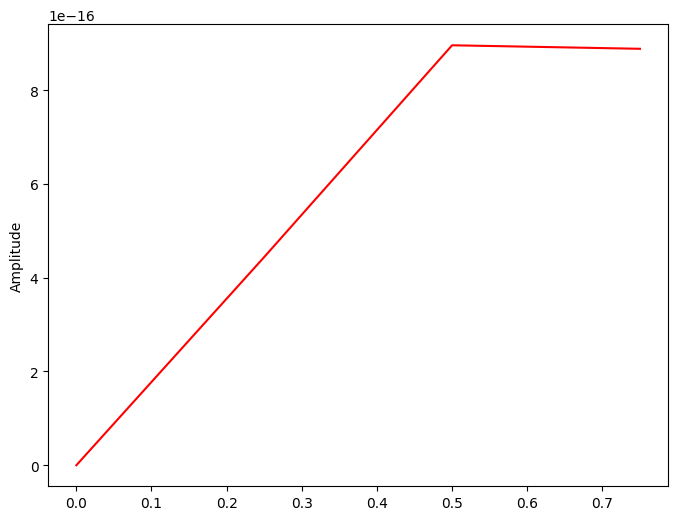

In [ ]:
# sampling rate
sr = 4
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 0
x = 10*np.sin(2*np.pi*freq*t)

freq = 1
x += 2.82843*np.sin(2*np.pi*freq*t)

freq = 2
x += 2* np.sin(2*np.pi*freq*t)

freq = 3
x += 2.82843* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

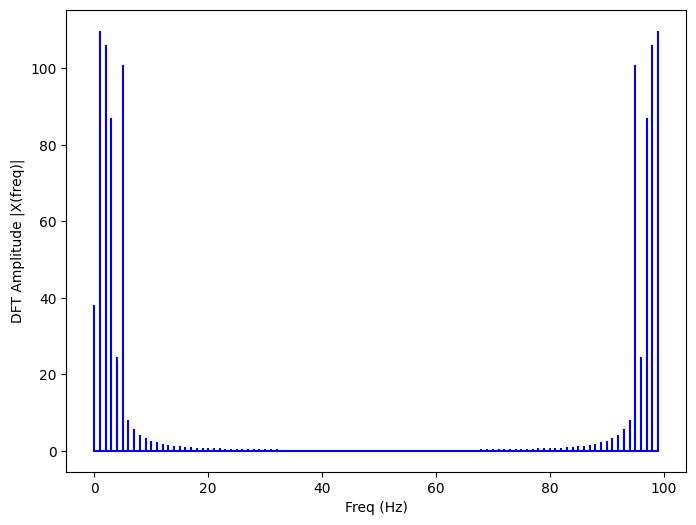

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [ ]:
sr = 14
len(x)

14

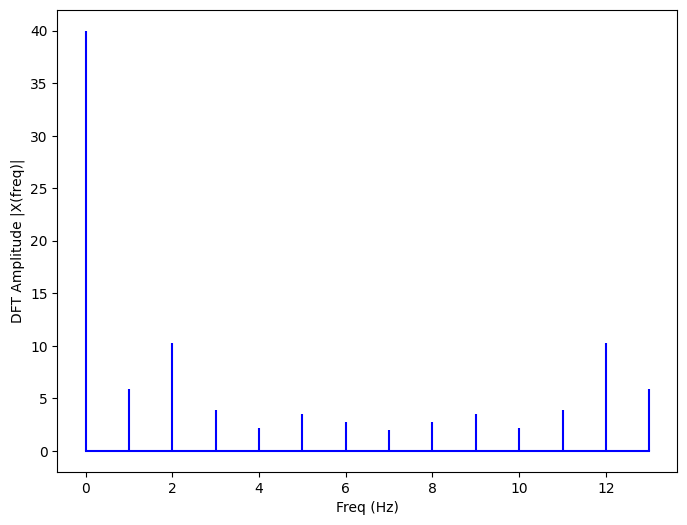

In [ ]:
x = [1, 2, 3, 4, 5, 4, 3, 2, 1, 5, 4, 3, 2, 1]

X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [ ]:
X

array([ 40.        +0.00000000e+00j,  -4.83996994-3.25150704e+00j,
       -10.16636635-1.16802434e+00j,   3.62833414-1.36112077e+00j,
        -1.19537386+1.84269539e+00j,  -1.2883642 -3.21326193e+00j,
         1.86174021+1.99754670e+00j,  -2.        -1.70275424e-14j,
         1.86174021-1.99754670e+00j,  -1.2883642 +3.21326193e+00j,
        -1.19537386-1.84269539e+00j,   3.62833414+1.36112077e+00j,
       -10.16636635+1.16802434e+00j,  -4.83996994+3.25150704e+00j])

In [ ]:
# n_oneside = N//2
# # get the one side frequency
# f_oneside = freq[:n_oneside]

# # normalize the amplitude
# X_oneside =X[:n_oneside]/n_oneside

# plt.figure(figsize = (12, 6))
# plt.subplot(121)
# plt.stem(f_oneside, abs(X_oneside), 'b', \
#          markerfmt=" ", basefmt="-b")
# plt.xlabel('Freq (Hz)')
# plt.ylabel('DFT Amplitude |X(freq)|')

# plt.subplot(122)
# plt.stem(f_oneside, abs(X_oneside), 'b', \
#          markerfmt=" ", basefmt="-b")
# plt.xlabel('Freq (Hz)')
# plt.xlim(0, 10)
# plt.tight_layout()
# plt.show()

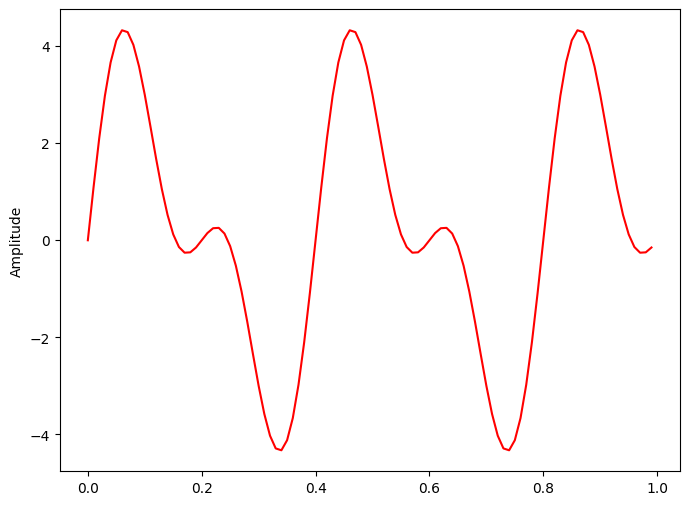

In [ ]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 0
x = 10*np.sin(2*np.pi*freq*t)

freq = 2.5
x += 3*np.sin(2*np.pi*freq*t)

freq = 5
x += 2* np.sin(2*np.pi*freq*t)

# freq = 75  
# x += 3* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
x

array([ 0.00000000e+00,  1.08733738e+00,  2.10262149e+00,  2.98000549e+00,
        3.66546879e+00,  4.12132034e+00,  4.32916402e+00,  4.29105356e+00,
        4.02874005e+00,  3.58109901e+00,  3.00000000e+00,  2.34503103e+00,
        1.67759904e+00,  1.05498558e+00,  5.24937951e-01,  1.21320344e-01,
       -1.38757276e-01, -2.56062490e-01, -2.48519521e-01, -1.48730594e-01,
       -1.22464680e-16,  1.48730594e-01,  2.48519521e-01,  2.56062490e-01,
        1.38757276e-01, -1.21320344e-01, -5.24937951e-01, -1.05498558e+00,
       -1.67759904e+00, -2.34503103e+00, -3.00000000e+00, -3.58109901e+00,
       -4.02874005e+00, -4.29105356e+00, -4.32916402e+00, -4.12132034e+00,
       -3.66546879e+00, -2.98000549e+00, -2.10262149e+00, -1.08733738e+00,
       -1.71450552e-15,  1.08733738e+00,  2.10262149e+00,  2.98000549e+00,
        3.66546879e+00,  4.12132034e+00,  4.32916402e+00,  4.29105356e+00,
        4.02874005e+00,  3.58109901e+00,  3.00000000e+00,  2.34503103e+00,
        1.67759904e+00,  

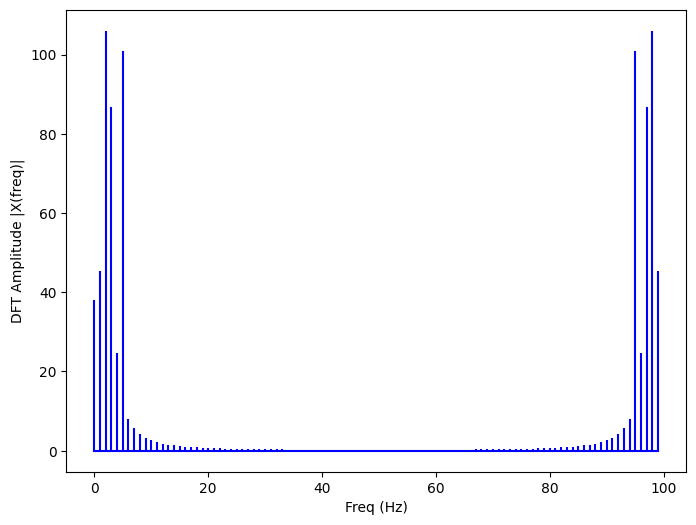

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

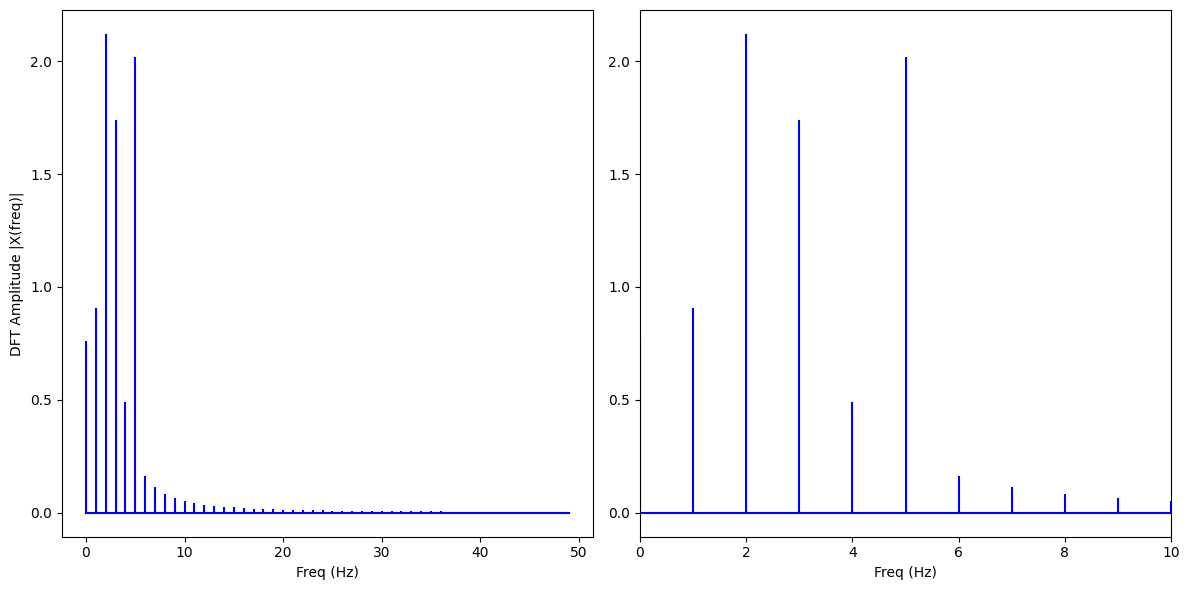

In [ ]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [ ]:
X_oneside

array([ 0.76237228+0.00000000e+00j,  0.90788506-1.14352972e-16j,
        2.12049322+1.67088565e-16j, -1.73780999+2.28705943e-16j,
       -0.49128394-1.03028697e-15j, -0.25622715-2.00000000e+00j,
       -0.16207507+4.32986980e-16j, -0.11327446-1.11022302e-16j,
       -0.08426942-6.48370246e-16j, -0.06547182+3.37507799e-16j,
       -0.05253259-2.24265051e-16j, -0.0432189 +4.59632332e-16j,
       -0.03627891+2.03170814e-16j, -0.03096269-6.12843110e-16j,
       -0.0267971 +1.81854531e-15j, -0.02347086-7.99360578e-17j,
       -0.020772  +7.50510765e-16j, -0.01855194-2.47801779e-15j,
       -0.01670389-7.06101844e-16j, -0.01514948-9.05941988e-16j,
       -0.01383006+1.61648472e-15j, -0.01270107+3.19744231e-16j,
       -0.01172808+2.84217094e-16j, -0.01088423-1.42108547e-15j,
       -0.01014822-1.31450406e-15j, -0.00950307-2.02504680e-15j,
       -0.00893504-7.10542736e-17j, -0.00843296-4.68958206e-15j,
       -0.00798767+2.55795385e-15j, -0.00759158+1.95399252e-15j,
       -0.0072384 -1.8118

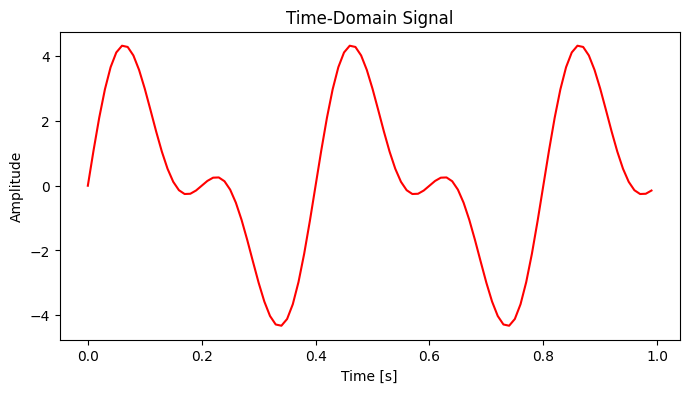

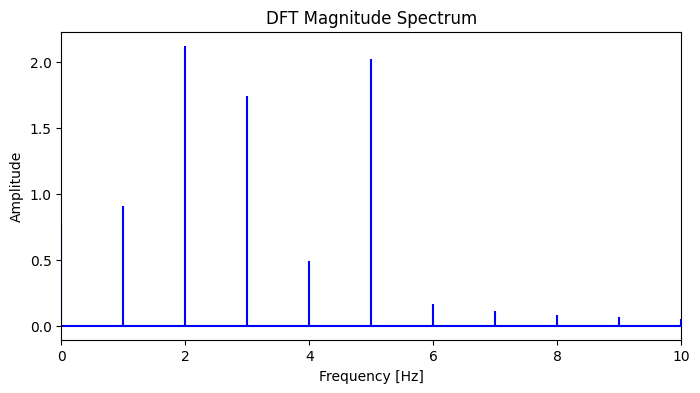

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Time-domain signal ---
sr = 100                 # Sampling rate (Hz)
ts = 1.0/sr              # Sampling interval
t = np.arange(0, 1, ts)  # Time vector (1 second)

# Sum of sine waves
x = 10*np.sin(2*np.pi*0*t)       # 0 Hz (DC)
x += 3*np.sin(2*np.pi*2.5*t)     # 2.5 Hz
x += 2*np.sin(2*np.pi*5*t)       # 5 Hz

# Plot time-domain signal
plt.figure(figsize=(8, 4))
plt.plot(t, x, 'r')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal')
plt.show()

# --- 2. Compute DFT ---
X = np.fft.fft(x)  # Use NumPy FFT for simplicity
N = len(X)         # Number of points
freq = np.fft.fftfreq(N, d=ts)  # Frequency vector

# --- 3. One-sided spectrum ---
n_oneside = N//2
X_oneside = X[:n_oneside] * 2 / N  # Normalize amplitude (except DC)
freq_oneside = freq[:n_oneside]

# --- 4. Plot frequency-domain (magnitude) ---
plt.figure(figsize=(8, 4))
plt.stem(freq_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('DFT Magnitude Spectrum')
plt.xlim(0, 10)  # Focus on main components
plt.show()
